# Практические задания к лекции № 7

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import shap

# load JS visualization code to notebook
shap.initjs()

- взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
- сделать обзорный анализ выбранного датасета
- сделать feature engineering
- обучить любой классификатор (какой вам нравится)
- разобраться с SHAP и построить важности признаков для:
    - всего тестового набора данных (summary_plot - дать интерпретацию)
    - для топ 10%
- для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [6]:
df_target = df['stroke']
df.drop('stroke', axis=1, inplace=True)

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [8]:
lab_enc = ['gender', 'ever_married', 'Residence_type']

In [9]:
enc = OrdinalEncoder()
df[lab_enc] = enc.fit_transform(df[lab_enc])

In [10]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1.0,67.0,0,1,1.0,Private,1.0,228.69,36.6,formerly smoked
1,51676,0.0,61.0,0,0,1.0,Self-employed,0.0,202.21,NaN,never smoked
2,31112,1.0,80.0,0,1,1.0,Private,0.0,105.92,32.5,never smoked
3,60182,0.0,49.0,0,0,1.0,Private,1.0,171.23,34.4,smokes
4,1665,0.0,79.0,1,0,1.0,Self-employed,0.0,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0.0,80.0,1,0,1.0,Private,1.0,83.75,NaN,never smoked
5106,44873,0.0,81.0,0,0,1.0,Self-employed,1.0,125.20,40.0,never smoked
5107,19723,0.0,35.0,0,0,1.0,Self-employed,0.0,82.99,30.6,never smoked
5108,37544,1.0,51.0,0,0,1.0,Private,0.0,166.29,25.6,formerly smoked


In [11]:
enc.categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Rural', 'Urban'], dtype=object)]

In [12]:
oh_enc = ['work_type', 'smoking_status']

In [13]:
df_oh_enc = pd.get_dummies(df[oh_enc])
df_oh_enc[:3]

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0


In [14]:
df = df.drop(['id', 'work_type', 'smoking_status'] ,axis = 1)
df = df.join(df_oh_enc)
df  

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0,1,1.0,1.0,228.69,36.6,0,0,1,0,0,0,1,0,0
1,0.0,61.0,0,0,1.0,0.0,202.21,NaN,0,0,0,1,0,0,0,1,0
2,1.0,80.0,0,1,1.0,0.0,105.92,32.5,0,0,1,0,0,0,0,1,0
3,0.0,49.0,0,0,1.0,1.0,171.23,34.4,0,0,1,0,0,0,0,0,1
4,0.0,79.0,1,0,1.0,0.0,174.12,24.0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1.0,1.0,83.75,NaN,0,0,1,0,0,0,0,1,0
5106,0.0,81.0,0,0,1.0,1.0,125.20,40.0,0,0,0,1,0,0,0,1,0
5107,0.0,35.0,0,0,1.0,0.0,82.99,30.6,0,0,0,1,0,0,0,1,0
5108,1.0,51.0,0,0,1.0,0.0,166.29,25.6,0,0,1,0,0,0,1,0,0


In [15]:
pd.isna(df).sum()

gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               201
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

Проведём замену Nan признака 'bmi'. Для этого сгруппируем людей по полу, затем по возрасту и возьмём медиану. Кроме того, введём новый признак 'bmi_nan', чтобы отметить заменённые значения.

<AxesSubplot:>

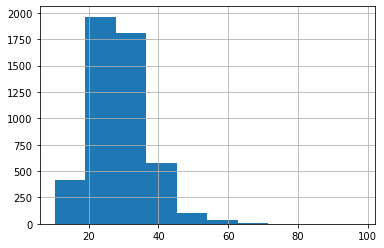

In [16]:
df.bmi.hist()

<AxesSubplot:>

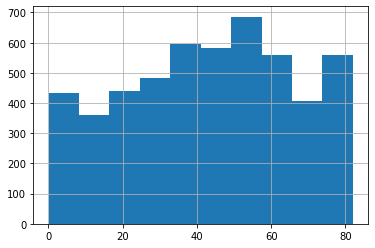

In [17]:
df.age.hist()

Из признака 'age' сделаем новый признак 'age_group'. Это будет 5 категорий по возрасту.

In [18]:
df['age_group'] = np.ceil(df.age / 17)
df['age_group'].value_counts()

4.0    1232
3.0    1224
2.0     989
1.0     856
5.0     809
Name: age_group, dtype: int64

Такими значениями будем заменять Nan:

In [19]:
df.groupby(['gender', 'age_group'])['bmi'].median()

gender  age_group
0.0     1.0          20.10
        2.0          27.00
        3.0          29.25
        4.0          29.80
        5.0          28.80
1.0     1.0          19.60
        2.0          27.40
        3.0          30.90
        4.0          30.70
        5.0          28.50
2.0     2.0          22.40
Name: bmi, dtype: float64

In [20]:
df['bmi_nan'] = df['bmi'].isna() * 1

df['bmi'] = df.groupby(['gender', 'age_group'])['bmi'].transform(lambda x: x.fillna(x.median()))

In [21]:
pd.isna(df).sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
age_group                         0
bmi_nan                           0
dtype: int64

In [22]:
df.drop('age_group', axis=1, inplace=True)

#### SHAP

In [23]:
model = BalancedRandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=28)
scores = cross_validate(model, df, df_target, scoring=('roc_auc', 'f1'), cv=cv, n_jobs=-1)
scores

{'fit_time': array([0.17752838, 0.18255091, 0.17955256, 0.17154431]),
 'score_time': array([0.04890108, 0.05481887, 0.05183315, 0.05285764]),
 'test_roc_auc': array([0.84590123, 0.8337469 , 0.82382881, 0.83577713]),
 'test_f1': array([0.23690205, 0.20776495, 0.22372881, 0.22058824])}

In [29]:
model.fit(df, df_target)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df.iloc[0])

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value[0], shap_values[0], df.iloc[0])

In [30]:
shap_values = explainer.shap_values(df)

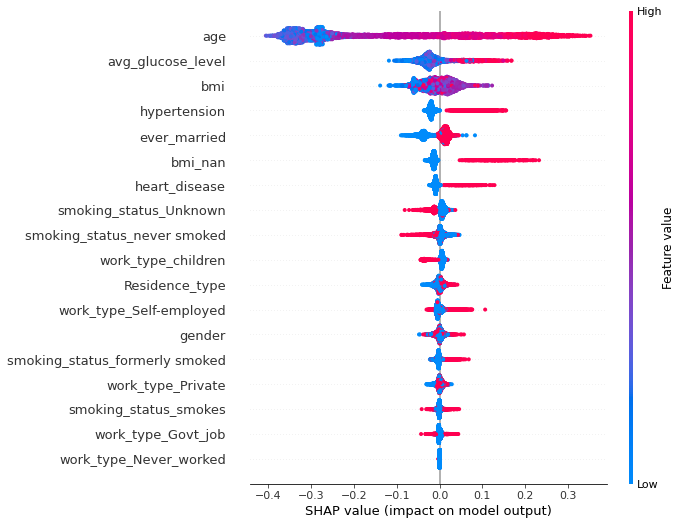

In [39]:
shap.summary_plot(shap_values[1], df, plot_type='dot')

Вероятность инсульта повышается:
- с возрастом, чем старше, тем вероятнее
- при высоком уровне сахара в крови
- если у человека высокий индекс массы тела, хотя здесь не однозначно - большое bmi не всегда приводит к инсульту. Скорее всего, bmi просто корелирует с уровнем сахара крови, а уже он значительно повышает вероятность инсульта.
- при гипертонии - очень хороший признак, по графику видна хоршая корреляция с целевым признаком
- наличие когда-либо брака - интересно, что судя по графику наличие брака повышает вероятность инсульта, но скорее всего этот признак просто коррелирует с возрастом (логично, что чем моложе человек, тем менее вероятно, что он женат или был когда-либо женат; однако на графике видна особенность -  отсутствие брака в редких случаях приводит к увеличению вероятности инсульта; я считаю, что эти точки отражают возрастных людей, но проверим это ниже)
- при заболеваниях сердца
- если когда-либо курил. К сожалению, судя по этим данным тот факт, что человек бросил курить не снижает вероятность инсульта, но снижает вероятность других заболеваний, совершенно точно. Возможно этот признак коррелирует с наличием каких-то заболеваний, то есть если человек заболел чем-то серьёзным (причиной чего может являться курение) и он вынужден бросить курить. Тогда инсульт связан с наличием серьёзного заболевания
- если живешь в городе, а не в сельской местности
- если мужчина, хотя этот признак не однозначен
- если работаешь сам на себя (видимо из-за стресса), хотя этот признак не однозначен.  

Интересно, что курение оказался неоднозначным признаком: у одной части людей он повышает вероятность инсульта, у второй - нет (видимо это та часть которая может себе позволить эту вредную привычку ввиду хорошего здоровья ('от природы' или компенсируется полезными привычками), ведь если нет - то человек попадает в первую часть людей или бросает курить, а оба этих параметра повышает вероятность инсульта)

Интересная особенность - у всех людей у кого отсутствовала запись bmi случился инсульт. Возможно у них очень высокий показатель, и просто постеснялись записать, или может быть данные этих людей уже записали посмертно. Здесь, наверное, можно только гадать.

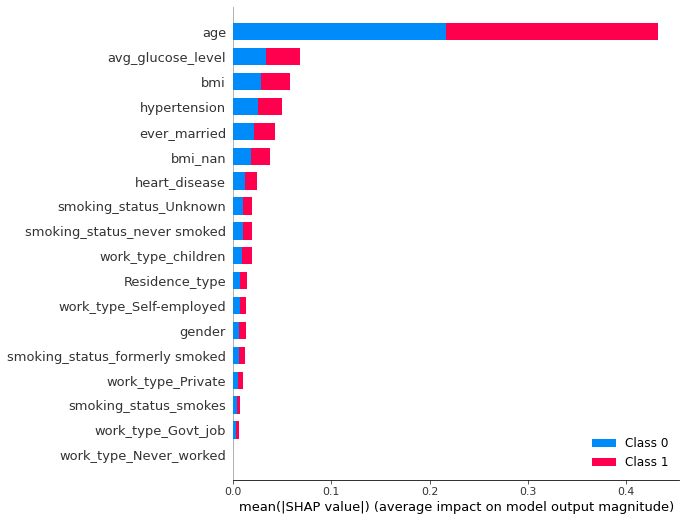

In [33]:
shap.summary_plot(shap_values, df, plot_type='bar')

График показывает, что наиболее важные признаки возраст, уровень сахара, индекс массы тела, наличие гипертонии и брака, заболевания сердца. 

Посмотрим как признак наличия когда-либо брака коррелирует с возрастом:

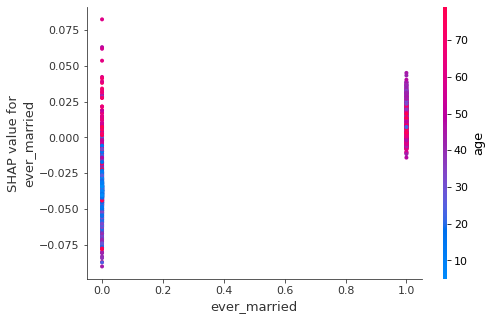

In [41]:
shap.dependence_plot('ever_married', shap_values[1], df, interaction_index='age') 

Да, как и предпологалось, эти два признака хорошо коррелируют друг с другом. Кроме того, shap value у возрастных людей никогда не бывших в браке выше, чем у молодых (хотя и у большинства таких людей на уровне тех, кто был или состоит в браке). Возможно, это был бы хороший новый признак. 

In [49]:
df['age_group'] = np.ceil(df.age / 17)
df = df.join(df_target)

In [57]:
df.groupby(['gender', 'age_group', 'ever_married'])['stroke'].apply(lambda x: x.sum()/x.count()*100)

gender  age_group  ever_married
0.0     1.0        0.0              0.478469
        2.0        0.0              0.000000
                   1.0              0.371747
        3.0        0.0              0.990099
                   1.0              2.398801
        4.0        0.0              8.888889
                   1.0              5.503145
        5.0        0.0             25.925926
                   1.0             15.850816
1.0     1.0        0.0              0.000000
        2.0        0.0              0.000000
                   1.0              0.000000
        3.0        0.0              3.571429
                   1.0              1.250000
        4.0        0.0              6.060606
                   1.0              7.915058
        5.0        0.0             18.181818
                   1.0             17.763158
2.0     2.0        0.0              0.000000
Name: stroke, dtype: float64

Если посмотреть на доли людей у кого был инсульт в зависимоти от пола, возраста и брака получается, что 
- для мужчин: в молодом и среднем возрасте лучше не жениться, чтобы понизить вероятность инсульта, а к более старшему возрасту лучше уже пожениться (значительно понижает вероятность инсульта) - может это как-то связано со стрессом.
- для женщин: в молодом возрасте никак не влияет (так как, видимо, быть молодой женщиной значит иметь иммунитет к инсульту - тоже хороший новый признак надо полагать), в среднем возрасте лучше выйти замуж, а в более старшем возрасте этот признак уже не так сильно влияет.  

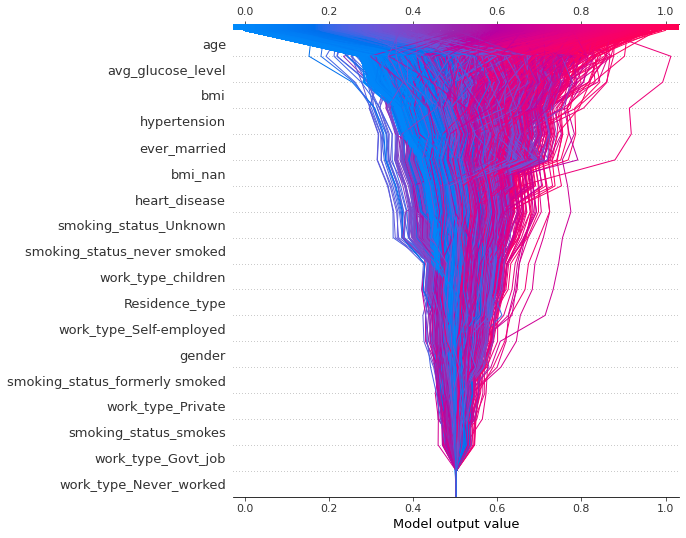

In [47]:
# shap.decision_plot(explainer.expected_value[1], shap_values[1], df, ignore_warnings=True)